<a href="https://colab.research.google.com/github/SidRaghuveer15/FirstRep/blob/main/BL_EN_U4CSE20161_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import math
def step_func(z):
  return 1 if (z>0) else 0

def Bipolar_step_func(z):
  return 1 if (z>0) else -1

def Relu_func(z):
  return z if (z>0) else 0

def sigmoid_func(z):
  x=1/(1+math.exp(-z))
  return x  
  

In [ ]:
# Perceptron Code
class Perceptron:
  def __init__(self,weights,epochs,activation_func,learning_rate):
    self.w=weights
    self.af=activation_func
    self.a=learning_rate
    self.epoch=epochs
    self.error=[]
    self.e_count=0

  def learn(self,data):
    n=len(data[0])
    print(f"Initial Weights:{self.w}",)
    
    for epoch in range(self.epoch):
      self.e_count +=1
      total_error=0.0
      for value in data:
        x=self.w[0]
        for i in range(1,len(self.w)):
          x += value[i-1]*self.w[i]
      
        # Activation Function
      
        y=0 
        if self.af=='step':
          y=step_func(x)
        elif self.af=='bipolar':
          y=Bipolar_step_func(x)
        elif self.af=='Relu':
          y=Relu_func(x)
        elif self.af=='sigmoid':
          y=sigmoid_func(x)
      
        # Error Calculation
        err=(value[len(self.w)-1]-y)
        total_error += (err*err)
        
        # Weight Updation
        for i in range(len(self.w)):
          if i==0:
            self.w[i] +=(self.a*err)
          self.w[i] += (value[i-1]*self.a*err)
      
      self.error.append(total_error)
      if total_error <= 0.002:
        return self.error
        break
    print(f"Final weights : {self.w}, Epochs = {self.e_count}")
    return self.error

  def epoch_count(self):
    return self.e_count

  def graph(self):
    plt.figure(figsize = (12, 9))
    plt.plot(range(len(self.error)), self.error)
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.title(f"epochs vs error")
    plt.show()

In [ ]:
# Another code for Perceptron
def perceptron(weights,activation_function,learning_rate,data,epoch):
    e_count = 0
    error = []
    i=0
    w0 = weights[0]
    w1 = weights[1]
    w2 = weights[2]
    
    while i < epoch:
        e_count = e_count + 1
        j = 0
        e = []
        while j < len(data):
            x1 = data[j][0]
            x2 = data[j][1]
            target = data[j][2]
            z = w0 + x1*w1 + x2*w2
            #if-else ladder to make calling activation functions easier
            if activation_function=='step':
                y = step_func(z)
            elif activation_function=='bipolar':
                y = Bipolar_step_func(z)
            elif activation_function=='relu':
                y = Relu_func(z)
            elif activation_function=='sigmoid':
                y = sigmoid_func(z)
            if y == target: # Checking if obtained output is same as expected/targetted output
                e.append(0)
            else: # Weight updating
                w1 = w1 + learning_rate*(target - y)*x1
                w2 = w2 + learning_rate*(target - y)*x2
                w0 = w0 + learning_rate*(target - y)
                err = y - target  # obtained - expected output
                e.append(err)
            j = j + 1
        error.append(sum(e))
        if sum(e) <= 0.002:
            break
        i = i + 1
    print("Final Weights are : \n",w1,'\n',w2,'\n',w0,'\n')
    plt.figure(figsize = (12, 9))
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error")
    plt.plot(error)
    plt.show()
  

In [ ]:
and_gate=[[0,0,0],
          [0,1,0],
          [1,0,0],
          [1,1,1]]

xor_gate=[[0,0,0],
          [0,1,1],
          [1,0,1],
          [1,1,0]]

Initial Weights:[10, 0.2, -0.75]
Final weights : [-7.646661082105766e-15, 0.1000000000000001, 0.05000000000000032], Epochs = 1000


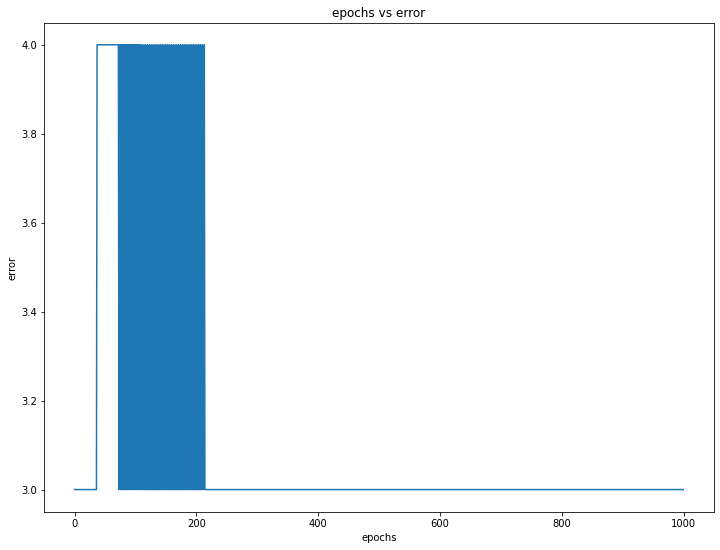

In [ ]:
# Question A1
And = Perceptron([10,0.2,-0.75],1000,'step',0.05)
And.learn(and_gate)
And.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


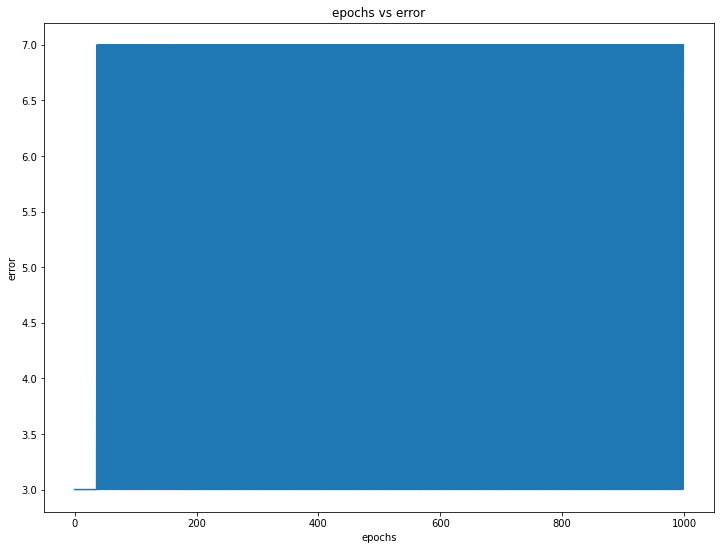

In [ ]:
# Question A2
# Bipolar Step Function
and_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
and_2.learn(and_gate)
and_2.graph()


Initial Weights:[10, 0.2, -0.75]
Final weights : [-2.628285432165413, 1.7528425503169744, 1.7378039027326262], Epochs = 1000


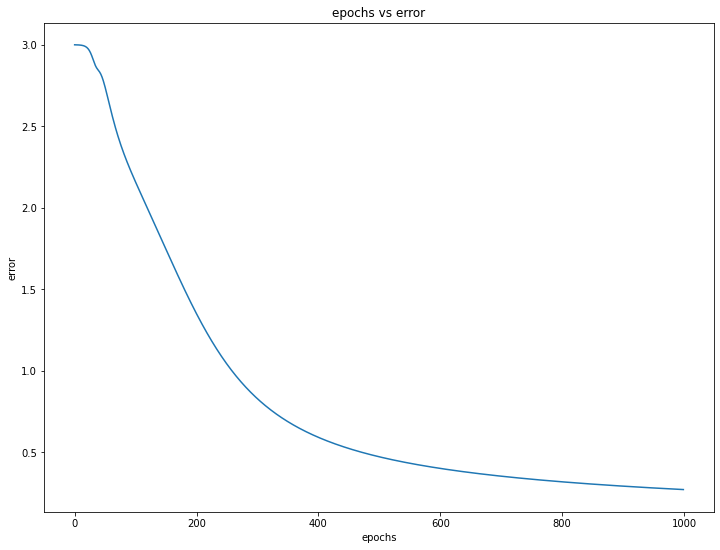

In [ ]:
# Sigmoid Function
and_3 = Perceptron([10,0.2,-0.75],1000,'sigmoid',0.05)
and_3.learn(and_gate)
and_3.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [109.99999999999588, 50.199999999999285, 49.24999999999934], Epochs = 1000


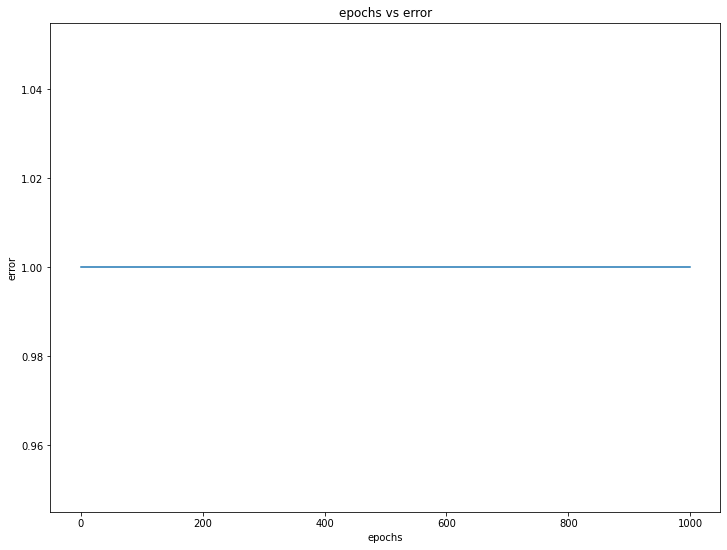

In [ ]:
# ReLU Function
and_4 = Perceptron([10,0.2,-0.75],1000,'relu',0.05)
and_4.learn(and_gate)
and_4.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [-3.5385648723861842, 2.393722114096895, 2.369645614250453], Epochs = 1000
[1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.34910075148687, 2.971570490653871, 2.9322343173162055], Epochs = 1000
[1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-4.800271329248686, 3.301417583274812, 3.2486905182188353], Epochs = 1000
[1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.115077445658475, 3.5371259162036783, 3.4720615651714937], Epochs = 1000
[1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.35773589807897, 3.7228829437590805, 3.646182728321556], Epochs = 1000
[1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.555744885152337, 3.877626716793616, 3.789800098564246], Epochs = 1000
[1000, 1000, 1000, 1000, 1000, 1000]
Initial Weights:[10, 0.2, -0.75]
Final weights : [-5.723435001191182, 4.01124344795238, 3.9126814236696554], Epochs = 1000
[10

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

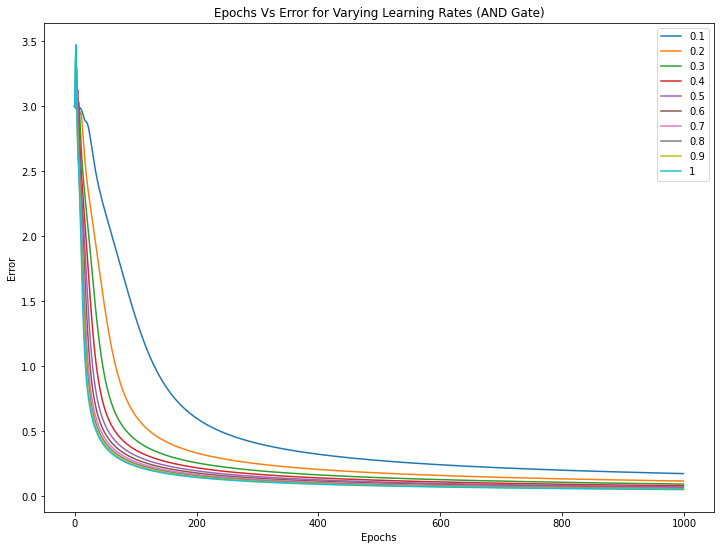

In [ ]:
# Question A3
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
epochs = []

for i in learning_rate:
  P=Perceptron([10,0.2,-0.75],1000,'sigmoid',i)
  errors.append(P.learn(and_gate))
  epochs.append(P.epoch_count())
  print(epochs)
  plt.figure(figsize=(12,9))

for i in errors:
    plt.plot(range(1000), i)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error for Varying Learning Rates (AND Gate)")
    plt.legend(learning_rate)

Initial Weights:[10, 0.2, -0.75]
Final weights : [0.19999999999999235, -0.1499999999999997, -0.09999999999999969], Epochs = 1000


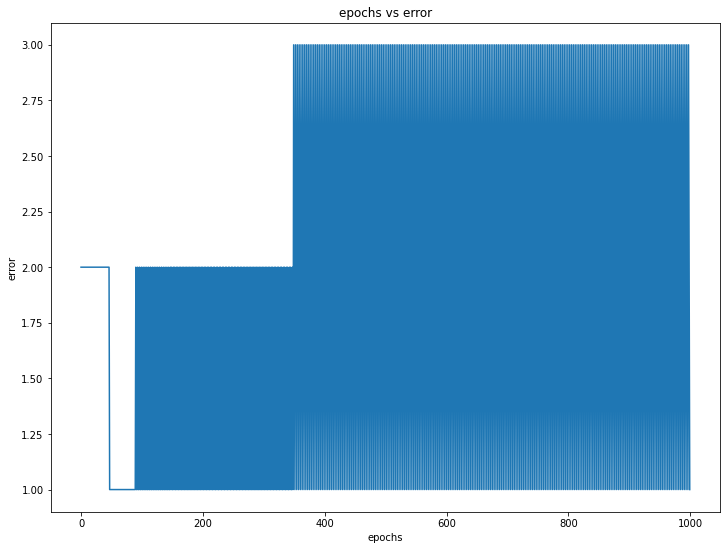

In [ ]:
# Question A4 
# A1 for xor
Xor = Perceptron([10,0.2,-0.75],1000,'step',0.05)
Xor.learn(xor_gate)
Xor.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [0.10000000000003427, 0.09999999999999777, 0.050000000000012645], Epochs = 1000


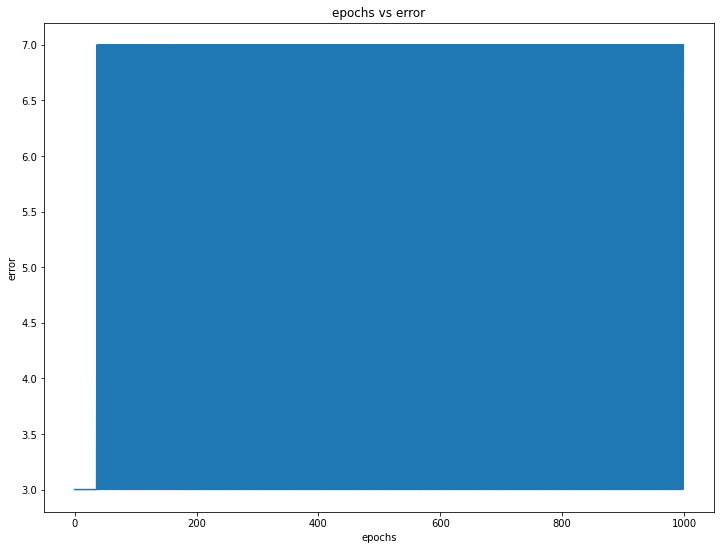

In [ ]:
# A2 for xor
# Bipolar Function
xor_2 = Perceptron([10,0.2,-0.75],1000,'bipolar',0.05)
xor_2.learn(and_gate)
xor_2.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [-2.628285432165413, 1.7528425503169744, 1.7378039027326262], Epochs = 1000


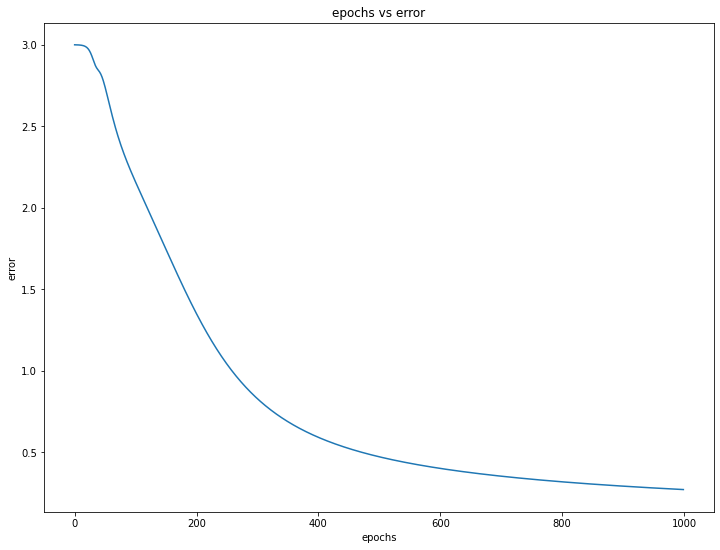

In [ ]:
# Sigmoid Function
xor_3 = Perceptron([10,0.2,-0.75],1000,'sigmoid',0.05)
xor_3.learn(and_gate)
xor_3.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [109.99999999999588, 50.199999999999285, 49.24999999999934], Epochs = 1000


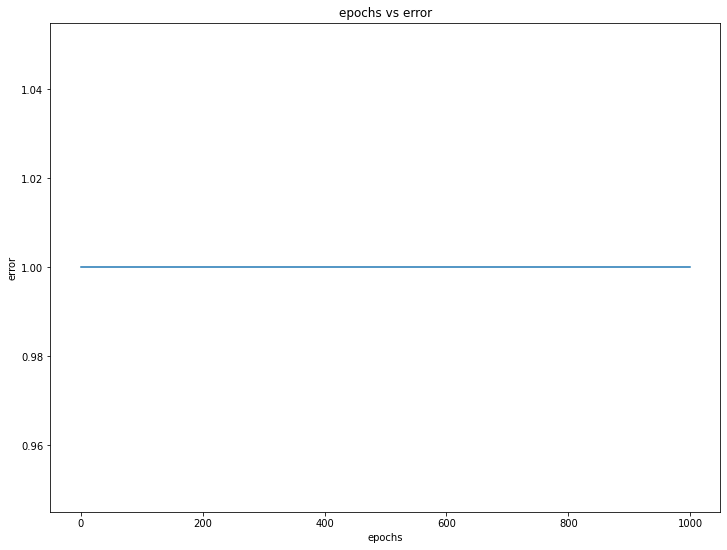

In [ ]:
# ReLU Function
xor_4 = Perceptron([10,0.2,-0.75],1000,'relu',0.05)
xor_4.learn(and_gate)
xor_4.graph()

Initial Weights:[10, 0.2, -0.75]
Final weights : [2.622570267463035, -1.7910888487600722, -1.7292357499582947], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [2.78474848248969, -1.940221927548809, -1.8146442552974664], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [2.9680496735667763, -2.1055144109274018, -1.9152924858148739], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.159891641363517, -2.277136065913149, -2.0213236084429], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.359384966725389, -2.4543479373459824, -2.1322109980524475], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.5655753343688996, -2.6363827807339657, -2.2473839440019168], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.777473903568473, -2.8224679226455374, -2.366239942245704], Epochs = 500
Initial Weights:[10, 0.2, -0.75]
Final weights : [3.994121017762747, -3.011870778602121, -2.4881856284616863], Epochs = 500
Initia

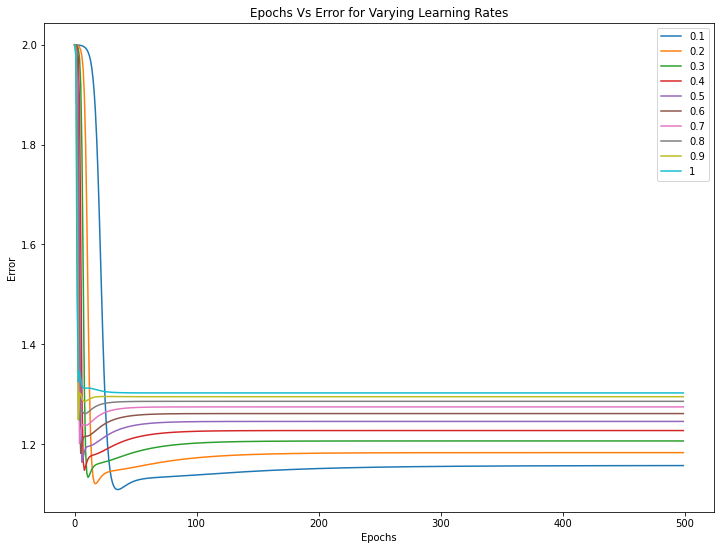

In [ ]:
# A3 for Xor gate
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
errors = []
epochs = []

for i in learning_rate:
  P_x=Perceptron([10,0.2,-0.75],500,'sigmoid',i)
  errors.append(P_x.learn(xor_gate))
  epochs.append(P_x.epoch_count())

print(epochs)
plt.figure(figsize=(12,9))

for i in errors:
    plt.plot(range(500), i)
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Epochs Vs Error for Varying Learning Rates")
    plt.legend(learning_rate)

In [ ]:
# Question A5
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)
df

,Candies,Mangoes Milk,Packets,Payment High,Value
0,20,6,2,386,Yes
1,16,3,6,289,Yes
2,27,6,2,393,Yes
3,19,1,2,110,No
4,24,4,2,280,Yes
5,22,1,5,167,No
6,15,4,2,271,Yes
7,18,4,2,274,Yes
8,21,1,4,148,No
9,16,2,4,198,No


Initial Weights:[0.2, -0.75, 1, 10]


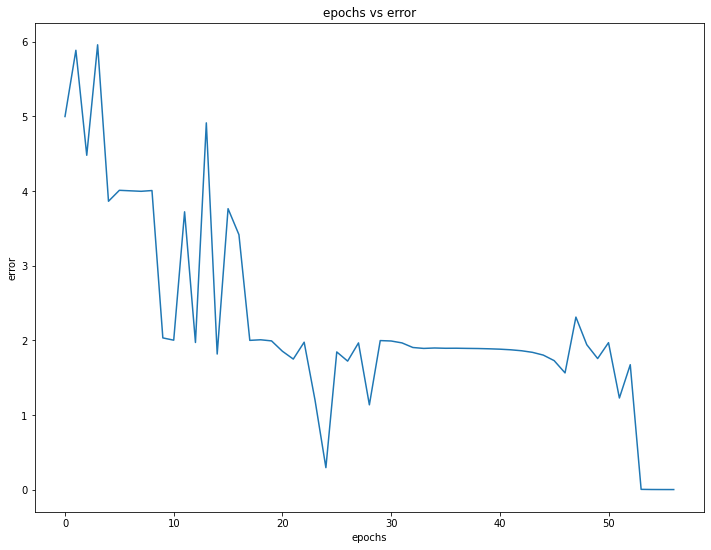

[4.9983302607733915, 5.88568961960136, 4.479352755317259, 5.95913101598713, 3.863582211502779, 4.010182863746873, 4.003485646097672, 3.996794827942508, 4.007029755574035, 2.033256789861716, 2.00271998062469, 3.722253864295893, 1.9719179426455902, 4.913423729213241, 1.8172368734704398, 3.7640575320480845, 3.4159234606344375, 2.000268269785882, 2.008168439799655, 1.9931973892168886, 1.8544916707111962, 1.7498028671585624, 1.975774495915258, 1.1999319952549343, 0.2954942457738477, 1.845188934511466, 1.722507636728363, 1.9663257164551828, 1.136868105356768, 1.9973344710987, 1.9919007489987504, 1.9663291106212366, 1.9047892439840988, 1.8924865246912321, 1.8980981088931197, 1.8943308795704346, 1.895024138808941, 1.8927411135957617, 1.8909983264985395, 1.8873916474474974, 1.882310200989986, 1.8741040981669381, 1.8612181346838836, 1.8399892107102689, 1.8029273477975192, 1.7288158178956081, 1.5645951896451322, 2.312008177012116, 1.942388046406942, 1.7567727068591708, 1.9695788961161145, 1.22826

In [ ]:
c=Perceptron([0.2,-0.75,1,10],1000,'sigmoid',0.1)
customer = [[20,6,2,1],[16,3,6,1],[27,6,2,1],[19,1,2,0],[24,4,2,1],[22,1,5,0],[15,4,2,1],[18,4,2,1],[21,1,4,0],[16,2,4,0]]
t=c.learn(customer)
c.graph()
print(t)

In [ ]:
# Question A6
A = df.iloc[:,0:3]
C = df.iloc[:,3:4]
A

,Candies,Mangoes Milk,Packets
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [ ]:
C

,Payment High
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [ ]:
Inv_A = np.linalg.pinv(A)
X=np.matmul(Inv_A,C)
print("Cost of Each Product is Matrix X:", X)

c_1=Perceptron([0.2,-0.75,1,10],1,'sigmoid',0.1)
y = c_1.learn(customer)

Cost of Each Product is Matrix X:    Payment High
0           1.0
1          55.0
2          18.0
Initial Weights:[0.2, -0.75, 1, 10]
Final weights : [0.30059516480095416, -3.0416687240330256, 1.5016289350097365, 9.300592316139257], Epochs = 1


In [ ]:
# Report Question 1
import pandas as pd
dim1 = 20 #x-dimension
dim2 = 20 #y-dimension
data = {'x1':[],'x2':[],'label':[]}
for x_c in range(dim1):
    for y_c in range(dim2):
        if x_c % 2 == 0 and y_c % 2 == 0:
            label = 1
        elif x_c % 2 == 1 and y_c % 2 == 1:
            label = 1
        else:
            label = 0
        data['x1'].append(x_c)
        data['x2'].append(y_c)
        data['label'].append(label)
data = pd.DataFrame(data)
data

,x1,x2,label
0,0,0,1
1,0,1,0
2,0,2,1
3,0,3,0
4,0,4,1
...,...,...,...
395,19,15,1
396,19,16,0
397,19,17,1
398,19,18,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


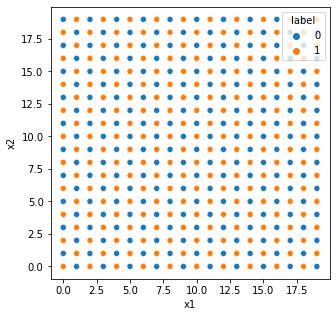

In [ ]:
# Visualization of checker board problem
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.scatterplot(data['x1'],data['x2'],data['label'])